In [60]:
import healpy as hp
import numpy as np

In [61]:
def pix2radec(nside, index):
    theta,phi=hp.pixelfunc.pix2ang(nside,index)
    return -np.degrees(np.pi*2.-phi), -np.degrees(theta-np.pi/2.)

def radec2pix(nside, RA, dec):
    return hp.pixelfunc.ang2pix(nside,np.radians(-dec+90.),np.radians(360.-RA))

In [62]:
nside = 128
npix = hp.nside2npix(nside)
patch = np.zeros(npix)
indices = np.arange(npix)
RA, dec = pix2radec(nside, indices)
RA[(RA<-180)] += 360

In [63]:
south = indices[(dec> -65) & (dec<-25) & (RA>-50) & (RA<70)]
north1 = indices[(dec> -8.5) & (dec< 11.5) & (RA<-133.75) & (RA>-180)]
north2 = indices[(dec> -8.5) & (dec< 11.5) & (RA>126.25) & (RA<180)]

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


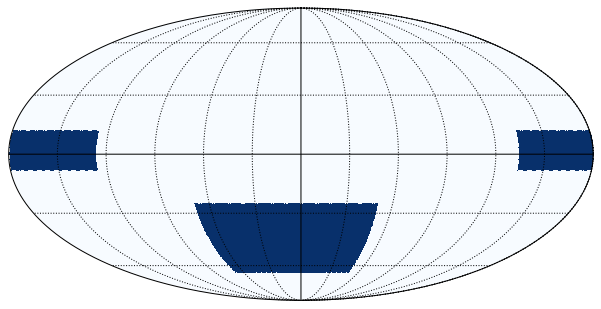

In [64]:
patch[south] = 1
patch[north1] = 1
patch[north2] = 1

hp.mollview(patch, cmap='Blues', xsize=2000, cbar=False, title=None)
hp.graticule()